In [95]:
from sklearn.metrics import roc_curve, auc, confusion_matrix
import matplotlib.pyplot as plt
import numpy as np

In [124]:
!ls '/home/rafael/GDrive/Models/baseline1/Reports_balanced/gender'


b5post_pt  brblogset_pt  brmoral_pt  pan13_en  pan13_es


[[423  42]
 [ 69 396]]
0.3888542027980113
[0 1 1 ... 0 1 1]
[[976 265]
 [255 986]]
0.4095631982993102


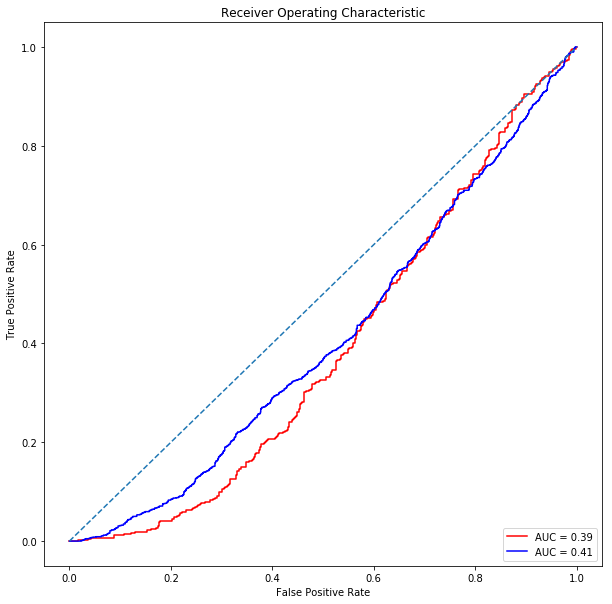

In [125]:
expected = "expected_y.numpy.npy"
score = "score_y.numpy.npy"
predicted = "predicted_y.numpy.npy"

# ONE MODEL
baseline1_balanced = '/home/rafael/GDrive/Models/baseline1/Reports_balanced/gender/b5post_pt/'

y_expected = np.load(baseline1_balanced+expected)
y_score = np.load(baseline1_balanced+score)
y_predicted = np.load(baseline1_balanced+predicted)
y_prob = np.amax(y_score, axis=1)
#y_prob2 = np.argmax(y_score, axis=1)

#print(y_prob2)

print(confusion_matrix(y_expected, y_predicted))

false_positive_rate1, true_positive_rate1, thresholds1 = roc_curve(y_expected, y_prob)
roc_auc1 = auc(false_positive_rate1, true_positive_rate1)
print(roc_auc1)
## ANOTHER MODEL

baseline2_balanced = '/home/rafael/GDrive/Models/baseline1/Reports_balanced/gender/brblogset_pt/'

y_expected = np.load(baseline2_balanced+expected)
y_score = np.load(baseline2_balanced+score)
#y_predicted = np.load(baseline2_balanced+predicted)
y_predicted = np.argmax(y_score, axis=1)
y_prob = np.amax(y_score, axis=1)

print(y_predicted)

print(confusion_matrix(y_expected, y_predicted))

false_positive_rate2, true_positive_rate2, thresholds2 = roc_curve(y_expected, y_prob)

roc_auc2 = auc(false_positive_rate2, true_positive_rate2)
print(roc_auc2)
## PLOTTING

plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate1,true_positive_rate1, color='red',label = 'AUC = %0.2f' % roc_auc1)
plt.plot(false_positive_rate2,true_positive_rate2, color='blue',label = 'AUC = %0.2f' % roc_auc2)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

(array([0.00000000e+00, 2.63504611e-05, 5.27009223e-05, ...,
        1.00000000e+00, 1.00000000e+00, 1.00000000e+00]),
 array([0.       , 0.       , 0.       , ..., 0.9998946, 0.9999473,
        1.       ]),
 array([2.        , 1.        , 1.        , ..., 0.50005169, 0.50002569,
        0.50001882]))

0.5114238678241427


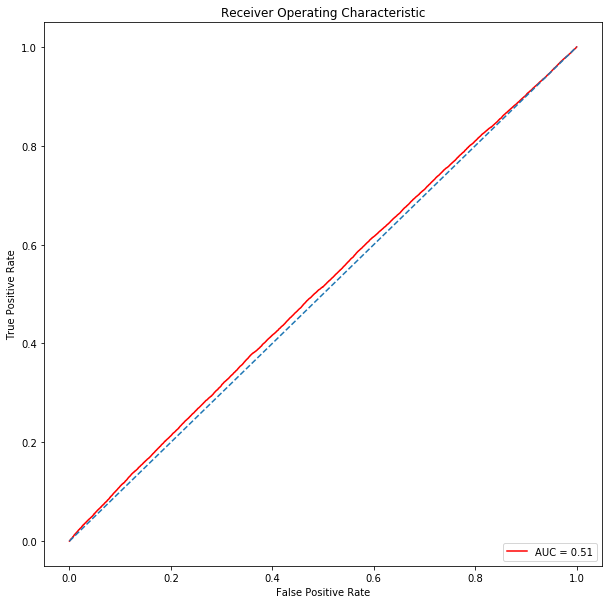

In [89]:
y_score[:,1]

array([0.02449504, 0.36069219, 0.99737802, ..., 0.85682609, 0.99999998,
       0.99708489])

In [ ]:
from sklearn.preprocessing import label_binarize

y_expected = label_binarize(y_expected, classes=[x for x in range(n_classes)])

fpr = dict()
tpr = dict()
roc_auc = dict()

# n_classes = 1 if n_classes == 2 else n_classes

fpr[i], tpr[i], _ = roc_curve(y_expected, y_prob)

#fpr[i], tpr[i], _ = roc_curve(y_test_bkp, y_score[:,i])

roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure()
lw = 2
plt.plot(fpr[i], tpr[i], color='darkorange',
         lw=lw, label='ROC curve of class {0} (area = {1:0.2f})'.format(classes_name[i], roc_auc[i]))
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC - Receiver operating characteristic')
plt.legend(loc="lower right")
if task != None and dataset_name != None:
    directory = './Reports/'+ task + '/' + dataset_name + '/'        
    checkFolder(directory)
    filename =  'ROC_curve_class_'+ str(classes_name[i]) +'.pdf'
    filename = directory + filename

    plt.savefig(filename)        
else:
    #plt.show()